In [1]:
## Hypothesis testing and P-Values (and critical values test)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

In [3]:
# Problem 2:
# height of girls in the past compared to now

In [4]:
# Problem 2:
# height of girls in the past compared to now

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

# Ho: u = 62.6 (mean height has not increased)
# Ha: u > 62.6 (mean height has increased)

# Placing the given heights into an array
data = [61.8, 66.1, 60.7, 66.6, 61.1, 66.9, 66.5, 61.9, 64.9, 67.4,
              61.5, 59.3, 64.5, 68.6, 63.7, 66.7, 69.4, 62.1, 62.3, 68.2,
              65.0, 62.3, 65.0, 62.0, 61.4]

n = len(data)
print(f'sample size: {n}')

null = 62.6

mean = np.mean(data)
print(f'mean: {mean}')

alpha = 0.01
print(f'alpha: {alpha}')

population_std = 2.88
print(f'population std: {population_std}')

std_var = population_std / np.sqrt(n)
print(std_var)

sample size: 25
mean: 64.236
alpha: 0.01
population std: 2.88
0.576


test for normality: ShapiroResult(statistic=0.9463927745819092, pvalue=0.20764747262001038)
do not reject the null


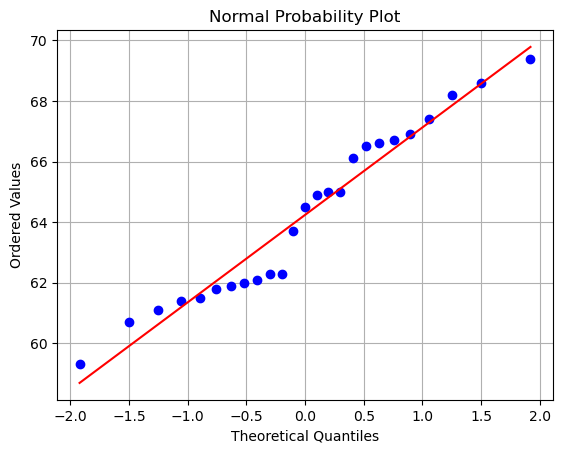

In [5]:
# Problem 2:
# height of girls in the past compared to now

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed
shapiro_test = stats.shapiro(data)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(data, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [6]:
# Problem 2:
# height of girls in the past compared to now

# critical-value test #
# obtain a z-score threshold that correspondes to alpha for the type of test involved
z_score_threshold = norm.ppf(1 - alpha) # Significance level for a right-tailed test
z_score_threshold = round(z_score_threshold,2)
print(f'z-score threshold: {z_score_threshold}')

z_score = ( mean - null) / (std_var)
z_score = round(z_score,2)
print(f'z-score: {z_score}')

# right-tail test condition
if z_score > z_score_threshold:
    print("reject the null")
else: 
    print("do not reject the null")

z-score threshold: 2.33
z-score: 2.84
reject the null


In [7]:
# Problem 2:
# height of girls in the past compared to now

# p-value test for significance 
p_value =  1 - norm.cdf(z_score) # right-tailed test
p_value = round(p_value,3)
print(p_value)

# right-tail test condition
if p_value < alpha:
    print("reject the null")
else:
    print("do not reject the null")


0.002
reject the null


In [8]:
# Problem 1
# Golf Driving Distances
# Ho: u = 275 yards
# Ha: u < 275 yards

# This is a left-tailed test. 

# null mean
null_mean = 275

# sampe of golf drive distances
data = [266, 254, 248, 249, 297, 261, 293, 261, 266, 
        279, 222, 212, 282, 281, 265, 240, 284, 253, 
        274, 243, 272, 279, 261, 273, 295
       ]

# sample size
n = len(data)

# mean
mean_data = np.mean(data)

# assume population standard deviation is 20
population_std_dev = 20

ShapiroResult(statistic=0.9602652192115784, pvalue=0.41978299617767334)
Since p-value of 0.4198 < 0.05 failed to reject the null hypothesis. The data is normally distributed


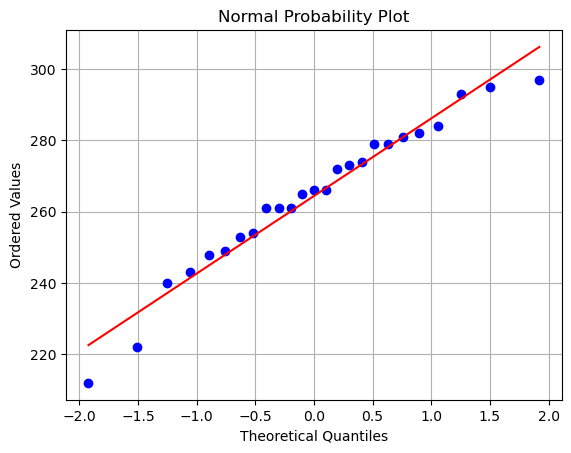

In [9]:
# Problem 1
# Golf Driving Distances

# test for normality
fix, ax = plt.subplots()
stats.probplot(data, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)

# Shapiro-Wilk test for normality
# Null Hypothesis: data is normaly distributed
# p-value must be < 0.05 to reject the null and conclude the data is not distributed. 
shapiro_test = stats.shapiro(data)
print(shapiro_test)

# Identify outliers using Z-scores
z_scores = np.abs(stats.zscore(data))
outliers = np.where(z_scores > 2.5)

shapiro_test, outliers
print(f'Since p-value of {round(shapiro_test[1],4)} < 0.05 failed to reject the null hypothesis. The data is normally distributed')

In [10]:
# Problem 1
# Golf Driving Distances

# Apply the Sampling Distribution of the Sample Mean
# If the null hypothesis is true then x-bar, the sample mean, should not be too far from u = 275. 

# standard deviation of the variable
std_var = (population_std_dev / np.sqrt(n))

# calculate the z-scores
z_scores_hypothesis  = ((mean_data - null_mean) / (population_std_dev /np.sqrt(len(data))))
z_scores_hypothesis_rounded = round(z_scores_hypothesis,2)
z_scores_hypothesis_rounded

-2.65

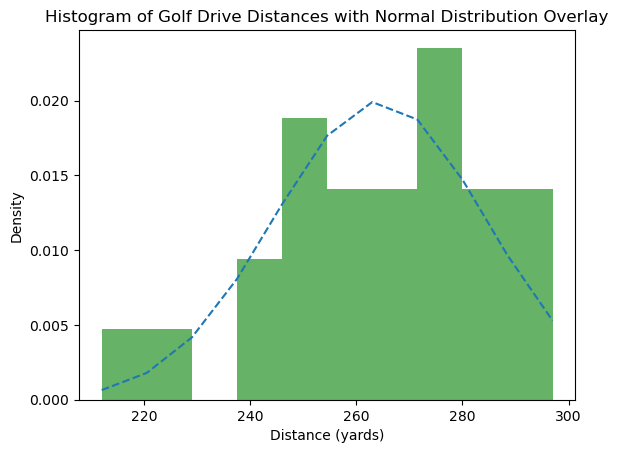

In [11]:
# Visualizing the data distribution with a histogram and normal distribution overlay
fig, ax = plt.subplots()
n, bins, patches = ax.hist(data, bins=10, alpha=0.6, color='g', density=True)

# Overlay normal distribution curve
y = norm.pdf(bins, mean_data, population_std_dev)
ax.plot(bins, y, '--')
plt.title("Histogram of Golf Drive Distances with Normal Distribution Overlay")
plt.xlabel("Distance (yards)")
plt.ylabel("Density")
plt.show()


In [12]:
# Problem 1
# Golf Driving Distances

# Calculate the p-value for the left-tailed test
p_value = norm.cdf(z_scores_hypothesis)
print(f"P-value: {round(p_value, 4)}")

# Determine if the p-value is less than the significance level (alpha)
alpha = 0.05
reject_null = p_value < alpha

print(f"Reject null hypothesis: {reject_null}")

P-value: 0.004
Reject null hypothesis: True


In [13]:
# Problem 1
# Golf Driving Distances

# Hypothesis Test Conclusion
print(f'null (claim): {null_mean}')
print(f'sample mean: {mean_data}')
print(f'z-score: {z_scores_hypothesis_rounded}')
print(f'p-value: {round(p_value, 4)}')
print(f'Reject null: {reject_null}')

# Interpretation
if reject_null:
    print(f'The p-value of {round(p_value, 4)} is less than the significance level of {alpha}.')
    print("Reject the null hypothesis. The mean driving distance is less than the claim of 275 yards.")
    print(f'The probability of making a Type I error is approximately {p_value}.')
else:
    print(f'The p-value of {round(p_value, 4)} is greater than the significance level of {alpha}.')
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest the mean driving distance is less than the claim of 275 yards.")

null (claim): 275
sample mean: 264.4
z-score: -2.65
p-value: 0.004
Reject null: True
The p-value of 0.004 is less than the significance level of 0.05.
Reject the null hypothesis. The mean driving distance is less than the claim of 275 yards.
The probability of making a Type I error is approximately 0.004024588542758239.
